In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [3]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,9.035400e+04,90353.000000,90353.000000,90353.000000,62120.000000,27499.000000,90353.000000
mean,1.002744e+06,8.087866,0.410412,5.300001,9.861317,12.656097,9292.215732
std,1.764520e+03,6.559983,0.491911,3.733615,5.084147,4.128635,4963.411008
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001194e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5859.000000
50%,1.002544e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8050.000000
75%,1.004257e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12042.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90354 entries, 0 to 90353
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     90354 non-null  int64  
 1   Product_ID                  90354 non-null  object 
 2   Gender                      90354 non-null  object 
 3   Age                         90354 non-null  object 
 4   Occupation                  90353 non-null  float64
 5   City_Category               90353 non-null  object 
 6   Stay_In_Current_City_Years  90353 non-null  object 
 7   Marital_Status              90353 non-null  float64
 8   Product_Category_1          90353 non-null  float64
 9   Product_Category_2          62120 non-null  float64
 10  Product_Category_3          27499 non-null  float64
 11  Purchase                    90353 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 8.3+ MB


In [5]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5759
Product_ID                     3299
Gender                            2
Age                               8
Occupation                       22
City_Category                     4
Stay_In_Current_City_Years        6
Marital_Status                    3
Product_Category_1               19
Product_Category_2               18
Product_Category_3               16
Purchase                      13659
dtype: int64

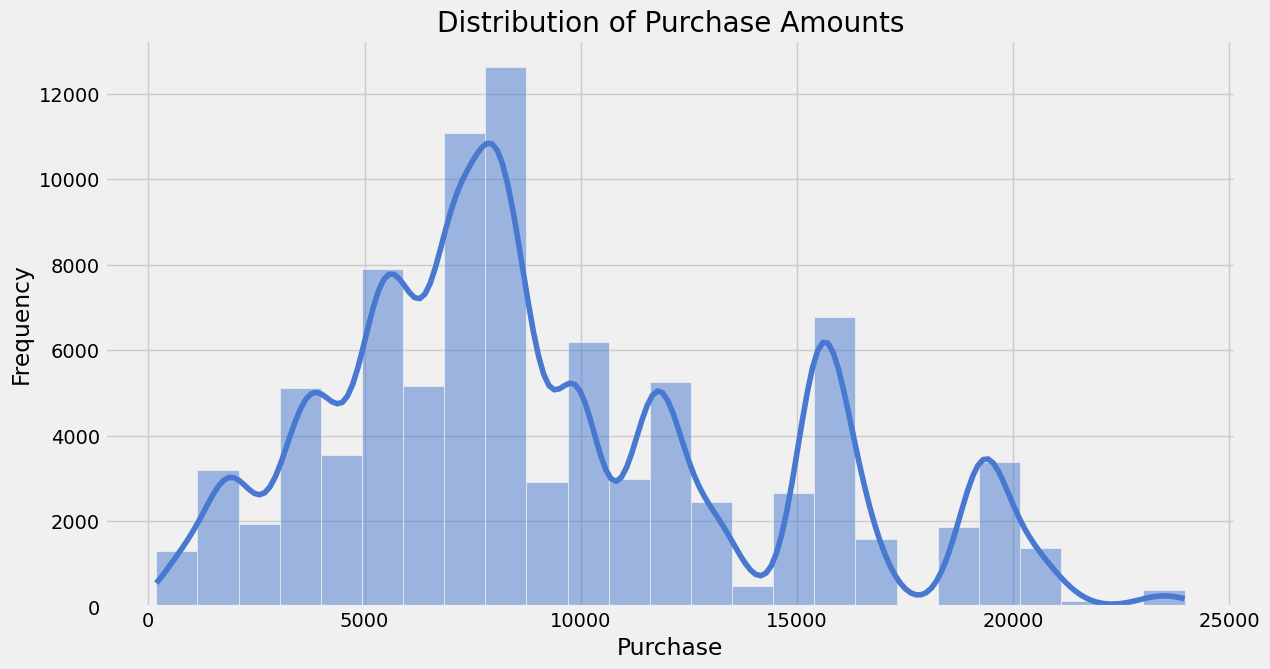

In [14]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.histplot(df['Purchase'], bins=25, kde=True, color=sns.color_palette("muted")[0])
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amounts')
plt.show()

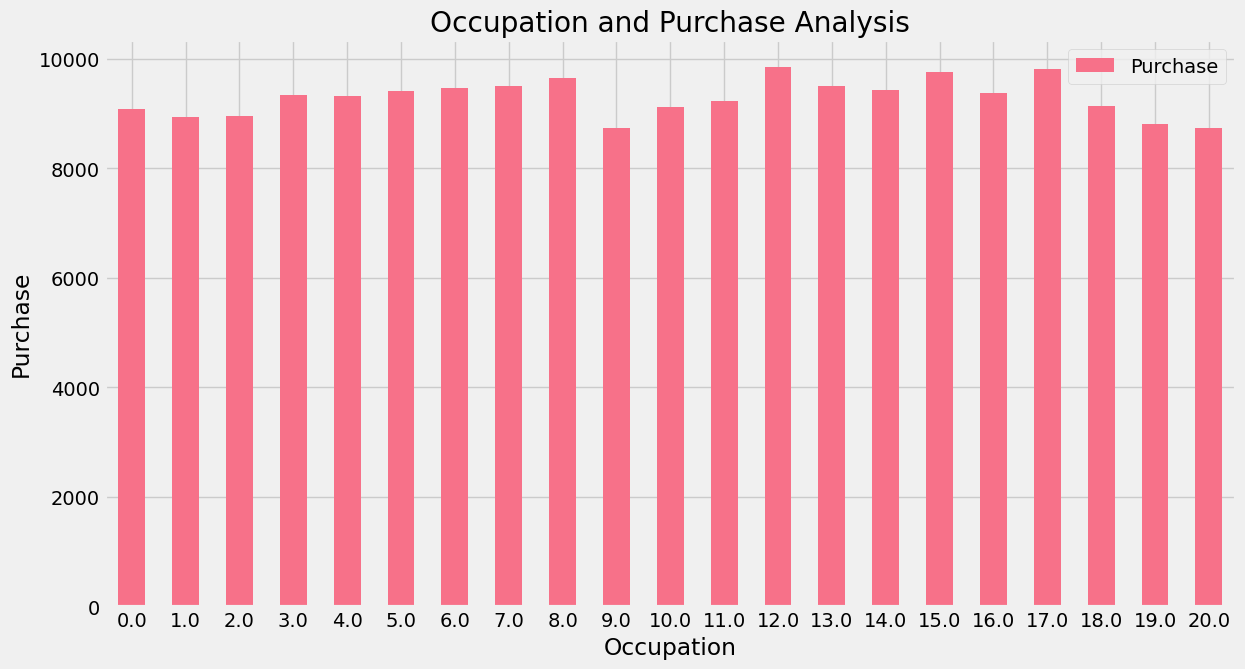

In [13]:
# Bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7), color=sns.color_palette("husl", len(occupation_plot)))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

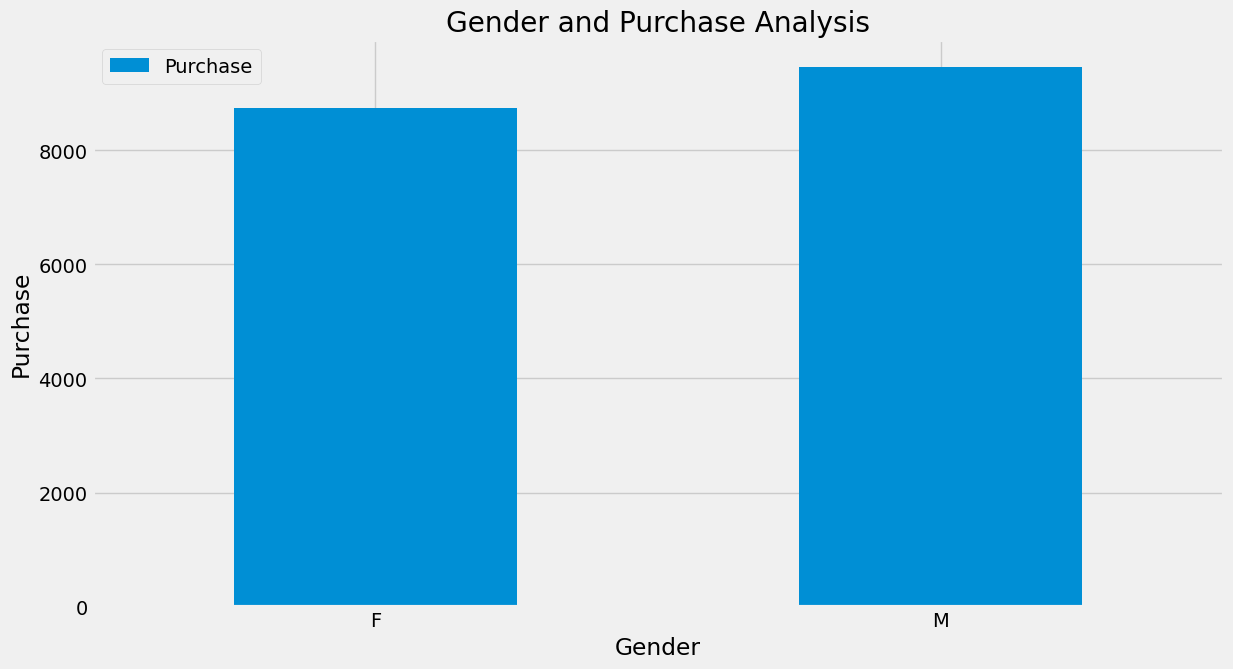

In [9]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [8]:
# check for null values
df.isnull().sum()
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            1
Product_Category_2            0
Product_Category_3            0
Purchase                      1
dtype: int64

In [15]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10.0,A,2,0.0,3.0,-2.0,-2.0,8370.0
1,1000001,P00248942,0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10.0,A,2,0.0,12.0,-2.0,-2.0,1422.0
3,1000001,P00085442,0,0-17,10.0,A,2,0.0,12.0,14.0,-2.0,1057.0
4,1000002,P00285442,1,55+,16.0,C,4+,0.0,8.0,-2.0,-2.0,7969.0


In [16]:
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10.0,0,2,0.0,3.0,-2.0,-2.0,8370.0
1,1000001,P00248942,0,0,10.0,0,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10.0,0,2,0.0,12.0,-2.0,-2.0,1422.0
3,1000001,P00085442,0,0,10.0,0,2,0.0,12.0,14.0,-2.0,1057.0
4,1000002,P00285442,1,7,16.0,2,4,0.0,8.0,-2.0,-2.0,7969.0


In [18]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))


Results
MSE: 0.2786482105509609
CV Score: 0.2855556054286644


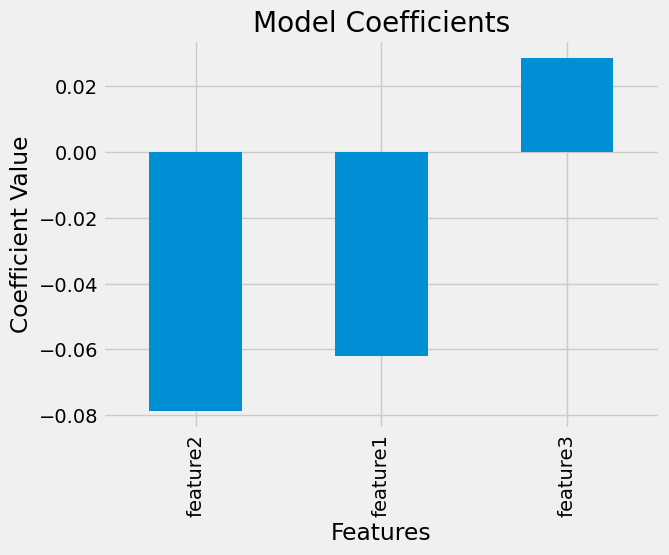

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# Example dataframe to simulate data
# Replace this with your actual dataset
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'target': np.random.rand(100)
}
df = pd.DataFrame(data)

# Defining features and target
X = df.drop('target', axis=1)
y = df['target']

def train(model, X, y):
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

# Initialize and train the model
model = LinearRegression()
train(model, X, y)

# Plotting the coefficients
coef = pd.Series(model.coef_, index=X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


Results
MSE: 0.30535710820880063
CV Score: 0.38970743625368354


<Axes: title={'center': 'Feature Importance'}>

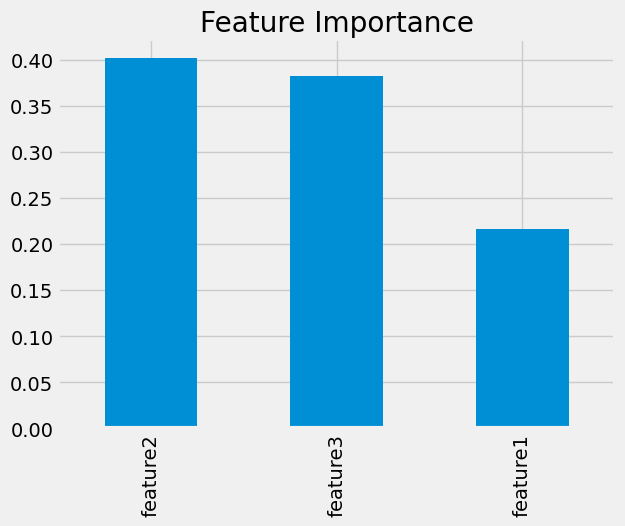

In [22]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')


Results
MSE: 0.25429430424304283
CV Score: 0.2996277839821126


<Axes: title={'center': 'Feature Importance'}>

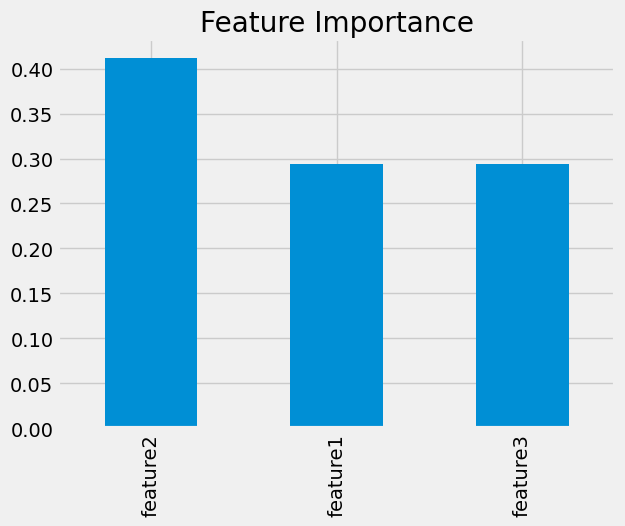

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')
